<a href="https://colab.research.google.com/github/tylerjmwhit/Maching_learning_pratice_notebooks/blob/main/Week1lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load MNIST dataset:

plot the average image of each of the digits. That is, for all 2 images in the training set, take the first pixel average is the average of all top left pixels. Functions in numpy will really help you here.

In [ ]:
from tensorflow.keras.datasets.mnist import load_data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

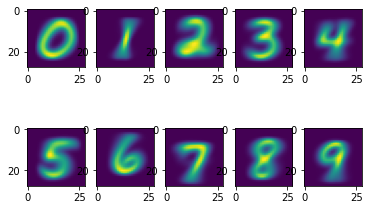

In [ ]:
(train_x, train_y), (test_x, test_y) = load_data()
avg = np.average(train_x[train_y==0])
for i in range(10):
  avgImg = np.average(train_x[train_y==i], 0)
  plt.subplot(2,5, i+1)
  plt.imshow(avgImg)


Load the Iris dataset:

- run logistic regression to predict the target variable (iris species) from the 4 input features (petal length, petal width, sepal length, sepal width). Display the precision and recall of each of the classes as well as the confusion matrix.

In [ ]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=200)
x = iris.data
y = iris.target
lr.fit(x,y)
df['pred'] = lr.predict(x)
print(df['pred'].value_counts())

comparison = df['target']==df['pred']
comparison.sum()/len(df)

2    52
0    50
1    48
Name: pred, dtype: int64


0.9733333333333334

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
confusion_matrix(df['target'], df['pred'])

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  1, 49]])

- run linear regression to predict the indexed (i.e. 0,1,2) target variable from the 4 input features. Round the predicted output to the nearest integer to represent the predicted class. From the rounded predictions, display the precision and recall for each of the classes and confusion matrix.

In [ ]:
iris2 = load_iris()
df2 = pd.DataFrame(iris2.data, columns=iris2.feature_names)
df2['target'] = iris2.target

from sklearn.linear_model import LinearRegression
lr1 = LinearRegression()
x2 = iris2.data
y2 = iris2.target
lr1.fit(x2,y2)
df2['pred'] = np.rint(lr1.predict(x))
print(df2['pred'].value_counts())

comparison = df2['target']==df2['pred']
comparison.sum()/len(df)

-0.0    50
 1.0    50
 2.0    50
Name: pred, dtype: int64


0.9733333333333334

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
confusion_matrix(df2['target'], df2['pred'])

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0,  2, 48]])

Load the Titanic dataset:

- run logistic regression to predict the target variable (survival) from the input features. Display the precision and recall as well as the confusion matrix.

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
import os
os.listdir('/content/drive/MyDrive/EE485_dataSets/')


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


['titanic_train.csv']

In [ ]:
titanic = pd.read_csv('/content/drive/My Drive/EE485_dataSets/titanic_train.csv')
titanic['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=200)
